# Vivo - AIOps Machine Learning Engineering Challenge
Olá candidatxs. Agradecemos o interesse pela vaga de [Engenharia de Machine Learning na área de AIOps da Telefónica Brasil S.A (Vivo)](https://vivo.gupy.io/jobs/180473). 

Esse notebook compreende a Data Challenge voltada à vaga de Engenharia de Machine Learning desenvolvido pela equipe de AIOps. O objetivo deste desafio é entender um pouco melhor como vocês pensam em relação à atuação de um(a) Engenheiro(a) de Machine Learning em projetos de Inteligência Artificial corporativos e como raciocinam frente a problemas parecidos com o que vivenciamos no dia-a-dia da área. Com isso, este desafio não é uma competição e não existem respostas erradas. O que vale é a resolução de problemas baseada em dados e como vocês comunicam suas respostas.

Por favor, leiam com atenção as propostas de cada uma das perguntas e se atentem para a as **Sugestões** e **Requerimentos** deste desafio. 

Vocês terão **três dias** para resolver os problemas aqui propostos, até o **23:59 do terceiro dia** após o envio do e-mail com o desafio. Se houver qualquer problema com o teste que atrapalhe o prazo de entrega, por favor comunique o responsável pelo teste, Mateus Gomes, no e-mail mateus.pgomes@telefonica.com.

## O que é AIOps na Vivo?
A área de AIOps da Vivo tem como objetivo melhorar a qualidade do serviço da Operação de TI (ITOps), agregando o que chamamos de Inteligência Operacional à companhia. Com isso, desenvolvemos soluções de dados para entregar insights de alto valor para a Operação, seja para tomar uma decisão, um direcionamento durante troubleshooting ou para entender tendências no ambiente e sistemas de TI.

A Operação de TI e os sistemas que a mesma governa geram dados de alta variabilidade, variedade e volume. Alguns dos tipos de dados envolvidos são:

- Logs de Aplicações; 
- Traps SNMP;
- Telemetria/Alertas de ferramentas de monitoração diversas;
- Incidentes registrados no ITSM;
- Métricas do negócio e diversos KPIs;

Apesar de gerarmos tantos dados e de tantas fontes diferentes, tendo em vista a alta complexidade do ambiente, a Operação tem dificuldade de interpretar e extrair insights relevantes destes dados rápido o suficiente. 

## Contexto dos clientes internos e usuários
A equipe de AIOps entra nesse cenário como fornecedora de insights e produtos para melhorar a qualidade das decisões, monitorações e sistemas da Vivo, a fim de tornar a Operação inteligente e proativa.

Neste escopo de atuação, temos três clientes importantes:
- CIM: o command center da operação, que faz a gestão dos incidentes e monitorações alto-nível do ambiente. O perfil destes profissionais é de N1 de atendimento, menos técnico que os níveis N2/N3;
- PCPs/Sustentação: profissionais de cunho MAIS técnico-operacional que fazem a gestão dos sistemas da companhia. Eles respondem os chamados de incidentes, fazem a gestão do ambiente produtivo dos seus respectivos sistemas, além de corrigirem problemas de performance e abrirem reports de bugs para os Desenvolvedores. São equivalentes ao atendimento N2/N3 da companhia;
- Executivos: tomadores de decisão da empresa, que precisam de dados para saber o que fazer;

## Requerimentos para responder este desafio
1. Só deverão ser utilizados para compor as respostas deste desafio os dados providenciados. Os dados aqui disponibilizados são fictícios e criados para simular situações reais de AIOps;
2. Qualquer referência utilizada para responder esse desafio deve ser listada na seção **Referências** desse notebook. Plágio não será aceito em hipótese alguma;
3. As respostas para as perguntas feitas aqui deverão ser respondidas em detalhe, a fim de capturar o seu processo de resolução de problemas; 
4. As respostas em código para as perguntas aqui colocadas deverão ser escritas utilizando, idealmente, Python, a fim de ser reproduzível no ambiente do **Google Colab**. 
    - Caso não respondam essa atividade utilizando alguma linguagem de programação nativa do ambiente de desenvolvimento referido acima, deverão enviar o código fonte junto a uma resposta para um dos e-mails de contato dispostos na seção **Contatos**, ou deve ser enviado um link do repositório contendo a resposta no **GitHub**; 
    - Todo código apresentado deve ser reproduzível. Portanto, se o código empregado para a solução não for reproduzível diretamente no ambiente de desenvolvimento **Google Colab**, será necessário providenciar os requisitos de ambiente usados para desenvolver a resposta; 
5. É muito importante para nós que a resolução de problemas sejam orientadas por dados. Se vocês acreditam que suas respostas funcionam, precisamos de informações para averiguar isso com dados e fatos. Respostas como "por experiência" não serão consideradas suficientes;
6. Não é necessário responder todas as perguntas, porém os encorajamos a tentar responder todas. Ao menos uma pergunta, porém, deve ser respondida; 

## Setup dos dados
Por favor, execute as linhas de código a seguir sem mudar nada. Elas farão o download dos dados para este desafio e os colocarão em um diretório chamado `datasets`. Imagens relevantes para este desafio também serão baixadas e colocadas no diretório `img`. 

In [ ]:
# # criando o diretório:
!echo 'Criando o diretório para os dados e imagens'
!mkdir ./datasets
!mkdir ./img

# # Baixando as imagens
!echo 'Baixando imagens'
!wget https://www.dropbox.com/s/i95umy72v37ayqf/estrutura_coleta.png?dl=0 -O ./img/estrutura_coleta.png

# # baixando dados para questão 1:
!echo 'Baixando dados para questão 1'
!wget https://www.dropbox.com/s/9h0kb34cori1bna/model_predictions.csv?dl=0 -O ./datasets/model_predictions.csv
    
# # baixando dados para questão 2:
!echo 'Baixando dados para questão 2'
!wget https://www.dropbox.com/s/l5wnklpl2xdy507/requests.json?dl=0 -O ./datasets/requests.json
    
# # baixando dados para questão 3:
!echo 'Baixando dados para questão 3'
!wget https://www.dropbox.com/s/82p5k4zq9eymg03/process_change.csv?dl=0 -O ./datasets/process_change.csv

# # baixando dados para questão 4:
!echo 'Baixando dados para questão 4'
!wget https://www.dropbox.com/s/z4mx9ynul6d7431/access.log?dl=0 -O ./datasets/access.log

## Questão 1: Caixas pretas
Você recebeu um e-mail de um analista da equipe de PCP que o "modelo de previsão em redes neurais" de uma ferramenta Z não parece estar funcionando muito bem. Segundo o analista, os resultados são muito variáveis e pouco acurados. Ao analisar a ferramenta, um colega de AIOps verifica que não há documentação pública existente em relação ao modelo aplicado, já que a ferramenta é uma verdadeira caixa preta.

O colega de equipe então extrai um resultado da base de treinamento usada para construir esse modelo de regressão e as predições originais do modelo para aquele dataset no momento inicial de configuração. Considere que esse dataset é representativo da tarefa em que esse modelo seria realmente aplicado e, no mundo real, há muito mais registros no dataset. 

O dataset foi disponibilizado no arquivo `model_predictions.csv` para que você possa analisar o que está acontecendo e consiste nos seguinte formato:

- `timestamp` é o timestamp do registro, no formato `[ano-mês-dia hora:minuto:segundo]`
- `values` são os valores de cada registro. 
- `predictions` são as predições realizadas para o modelo no memso período.

### Perguntas:
- **(a)** O que pode estar acontecendo com o modelo? 
- **(b)** Por quais motivos esse modelo poderia estar performando mal no cenário produtivo?
- **(c)** Como você explicaria pros seus colegas de AIOps o problema com o modelo? E para os gerentes? 
- **(d)** Que modelo você implementaria em substituição ao modelo da ferramenta Z? 
- **(e)** Por favor, demonstre a implementação do modelo sugerido.

### Respostas:
- **(a)** O que pode estar acontecendo com o modelo? 

Temos 2 linhas de raciocínio: 
1 - Pre-Processamento de dados não foi eficiente / completo ou as situações de sazonalidade, tendência e estacionariedade (casos de série temporal) não foram tratados e expostos no treinamento do modelo. Precisamos verificar valores de NA e outliers tb;
2 - Os Hiperparametros do modelo, profundidade da rede neural estão ineficientes e precisam de um ajuste, caso seja possível na ferramenta Z. 

Conforme análise abaixo, do R2 e do MAPE, existe logicamente um problema na performance com cerca de 51% de erros nas previsões.

- **(b)** Por quais motivos esse modelo poderia estar performando mal no cenário produtivo?

Tratando-se de redes neurais, precisamos verificar se os passos de pré-processamento dos dados 
foram feitos corretamente, como por exemplo, vários modelos de ML precisam que os dados estejam normalizados e padronizados (A normalização aplica escala aos dados com intervalos entre 0 e 1. A Padronização divide a média pelo desvio padrão para obter uma unidade de variância. Além desse ponto, teríamos que verificar também problemas de MultiColinearidade entre as variáveis, pois podem levar a perda da performance e fazermos a técnica de features selection também para diminuir a quantidade de varíaveis e tornar o modelo mais assertivo. 
Outra linha de raciocínio seria verificar o tamanho e período utilizado para o treinamento, aparentemente pelos dados informados, temos uma regressão em séries temporais. Séries temporais possuem sanzonalidade e estacionariedade por exemplo que devem ser enviados ao modelo para seu correto aprendizado, por exemplo, seu eu tenho um comportamento em Jan diferente de Fev, etc.; precisamos verificar se todas as situações dos dados e de negócio foram enviadas ao modelo.
Precisamos verificar valores de NA e outliers nos dados.  
        
- **(c)** Como você explicaria pros seus colegas de AIOps o problema com o modelo? E para os gerentes? 

Para os colegas de equipe, eu explicaria minha hipótese do pré-processamento e da construção do modelo preditivio que foi enviado e usado para o modelo da caixa preta, sobre o tamanho dos dados que foram usados no treinamento também, conforme expliquei acima. 
Para os gerentes, eu mostraria o resultado dos acertos em % e informaria que nosso percentual está abaixo do esperado e que precisamos analisar e remodelar seu funcionamento para termos uma assertividade melhor. 

- **(d)** Que modelo você implementaria em substituição ao modelo da ferramenta Z?

Sem conhecer os dados reais, fica difícil avaliar, mas eu começaria do mais simples e básico primeiramente, usando um KNN e um CART. Caso seja mesmo um dataset de śeries temporais, é o que eu acredito que seja, usaria o ARIMA. 

- **(e)** Por favor, demonstre a implementação do modelo sugerido.

Abaixo o código do KNN como exemplo. 

In [1]:
# Análise dos Resultados 

# Open o arquivo
from pandas import read_csv
from sklearn.metrics import r2_score
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

df = read_csv('datasets/model_predictions.csv', sep=',')

dados = df.values

# Resultados do modelo
r2 = r2_score(dados[:,1], dados[:,2])
print("O R2 do modelo é:", r2)

mae = mean_absolute_percentage_error(dados[:,1], dados[:,2])
print("O MAPE do modelo é:", mae)


O R2 do modelo é: 0.9798370048032164
O MAPE do modelo é: 51.14311150617916


In [2]:
# Modelo KNN - Demonstração, usei o mesmo dataset do problema como exemplo
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

df_knn = read_csv('datasets/model_predictions.csv', sep=',')

array = df_knn.values

# Separando o array em componentes de input e output
X = array[:,1]
Y = array[:,2]

# Divide os dados em treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.10, random_state = 5)

# Criando o modelo
modelo = KNeighborsRegressor()

# Treinando o modelo
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

modelo.fit(X_train, Y_train)

# Fazendo previsões
Y_pred = modelo.predict(X_test)

# Resultado
mse = mean_squared_error(Y_test, Y_pred)
print("O MSE do modelo é:", mse)



O MSE do modelo é: 14.106775647201212


## Questão 2: Detecção de Anomalias 
As equipes de Redes e Sustentação do sistema Z contataram a equipe de AIOps reportando problemas em relação à disponibilidade de um serviço específico.

Em momentos críticos para a empresa, o sistema Z tem quedas que torna o serviço praticamente inútil. Os analistas têm bastante dificuldade em identificar esse momentos rápido o suficiente e a olho nu, e tais problemas podem trazer consequências inesperadas tempos depois. 

A forma como este processo de coleta de métricas e logs é orquestrado hoje é ilustrado no seguinte diagrama:

![Arquitetura lógica do processo de ingestão de dados do sistema Z](img/estrutura_coleta.png "Arquitetura lógica do processo de ingestão de dados do sistema Z")

Um colega da equipe de AIOps providenciou um arquivo chamado `requests.json` contendo um monitoramento da quantidade de requests de sucesso de um dos principais serviços deste sistema. O dicionário de dados abaixo representa a informação disponível:

- `timestamp` é o timestamp do registro, no formato `[ano-mês-dia hora:minuto:segundo]`. No arquivo .json, ele está quebrado em seus metadados, como, por exemplo, `day`, `dayofyear`, etc. 

- `request_counts` é a quantidade de requests de sucesso, normalizado (entre 0 a 1). É um valor float64. 

### Perguntas:
- **(a)** Que tipo de modelo ou algoritmo pode ser construído para ajudar as equipes responsáveis pelo sistema Z a detectarem essas anomalias mais rapidamente?
- **(b)** Desenvolva o modelo sugerido.
- **(b)** Como você serviria esse modelo em um processo de streaming? 
- **(c)** Como você reportaria ou demonstraria os resultados do seu modelo? 
- **(d)** Que produto de dados pode ser desenvolvido para que as equipes que lhe apresentaram o problema mitiguem possa agir mais rápido? Por favor ilustre seus resultados.

### Respostas:
- **(a)** Que tipo de modelo ou algoritmo pode ser construído para ajudar as equipes responsáveis pelo sistema Z a detectarem essas anomalias mais rapidamente?

Pelo desenho da Arquitetura, eu implementaria a detecção de anomalia no próprio ElasticSearch. O ELK possui um módulo de ML para séries temporais e deteção de anomalias. 
Não usando o ELK, podemos fazer vários tipos de modelos como redes neurais, ARIMA ou o próprio XGBoost, KNN, SVM, mais simples e que pode funcionar muito bem. 
Eu começaria pelo modelo SVM para esse cenário proposto. 

- **(b)** Desenvolva o modelo sugerido.

Fontes do SVM abaixo.

- **(c)** Como você serviria esse modelo em um processo de streaming?

Eu recomendo utilizar o Spark Streaming em conjunto com um Flume ou Kafka coletando os dados e processando o modelo em real-time com o próprio modelo de ML (Spark ML).
Após o processamento o spark gravaria o log ou postaria num Kafka para a posterior leitura do LOGStash (Arquitetura atual do desenho apresentado). 

- **(d)** Como você reportaria ou demonstraria os resultados do seu modelo? 

Eu armazenaria os resultados do modelo previstos e os reais em algum repositório e diariamente montaria um processo de avaliação dos dados da acurácia dos acertos. Esse relatório seria enviado por email para as áreas responsáveis diariamente e penso num relatório mais gerencial de 15 em 15 dias. 

- **(e)** Que produto de dados pode ser desenvolvido para que as equipes que lhe apresentaram o problema mitiguem possa agir mais rápido? Por favor ilustre seus resultados.

Se o produto utilizado na deteção for o ELK, quando ele detectar a anomalia, conseguimos enviar um alerta (Watchers) para as equipe responsáveis e podemos criar gráficos no Kibana com um status de verde/amarelo/vermelho, mostrando a realidade atual e possível FORECAST futuro. 

In [3]:
import json
import pandas as pd

#Lendo o arquivo
data = []
with open('datasets/requests.json', 'r') as f:
        data = json.load(f)

# Criando dataframe do JSON
dados = pd.DataFrame.from_dict(data)
dados.head(10)

#Transformando o JSON em colunas
dadosX = dados[0].to_json()
dadosX_df = pd.read_json(dadosX, orient='index')
dadosX_df['percentual'] = dados[1]

dadosX_df.head()

,day,dayofyear,daysinmonth,freqstr,is_leap_year,month,ordinal,qyear,start_time,week,weekofyear,percentual
0,1,1,31,T,1,1,26297280,2020,2020-01-01 00:00:00,1,1,0.675424
1,1,1,31,T,1,1,26297281,2020,2020-01-01 00:01:00,1,1,0.684525
2,1,1,31,T,1,1,26297282,2020,2020-01-01 00:02:00,1,1,0.695691
3,1,1,31,T,1,1,26297283,2020,2020-01-01 00:03:00,1,1,0.714638
4,1,1,31,T,1,1,26297284,2020,2020-01-01 00:04:00,1,1,0.725812


In [4]:
#Removendo colunas desnecessarias
del dadosX_df['freqstr']

In [5]:
#Salvando a coluna temporariamente para escalar os dados
dadosX_df_start = dadosX_df['start_time']
del dadosX_df['start_time']

In [6]:
#Construindo o Modelo
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

scaler = StandardScaler()
np_scaled = scaler.fit_transform(dadosX_df)
df_novo = pd.DataFrame(np_scaled)

# train oneclassSVM 
model = OneClassSVM(nu=0.5, kernel="rbf", gamma=0.01)
model.fit(df_novo)
df_novo['Anomalia'] = pd.Series(model.predict(df_novo))

df_novo['start_time'] = dadosX_df_start


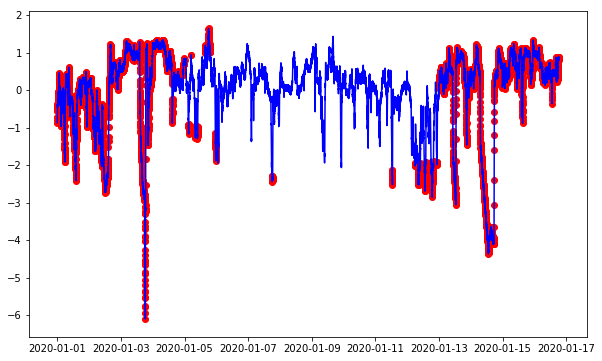

In [7]:
#Gráfico do Resultado
fig, ax = plt.subplots(figsize=(10,6))
a = df_novo.loc[df_novo['Anomalia'] == -1, ['start_time', 9]] 

ax.plot(df_novo['start_time'], df_novo[9], color='blue')
ax.scatter(a['start_time'],a[9], color='red')
plt.show();



## Questão 3: Gestão de Mudança
Um analista de AIOps está investigou um processo num sistema de TI e implementou um caso de uso com um modelo de regressão que atingia um coeficiente de determinação em torno de 0.75. O modelo implementado parecia estar funcionando bem na Operação por um tempo, dando resultados acurados o suficiente para tomada de decisões simples.

No entanto, com o tempo, a performance do modelo começou a se degradar, e registrou um coeficiente de determinação bem menor, em torno de -2.26. O colega de equipe, sem entender muito bem o que pode estar acontecendo, pediu sua ajuda para analisar essa questão. Os dados coletados para analisar este problema foram disponibilizados no arquivo `process_change.csv`. O arquivo segue o formato abaixo:

- `timestamp` é o timestamp do registro, no formato `[ano-mês-dia hora:minuto:segundo]`
- `values` é o valor agregado ao referido processo. 

**Observação**: 
Sabe-se que em algum momento entre o mês de Janeiro e Março de 2020, houve uma alteração no processo (por conta de uma nova release) que está sendo monitorado que não foi comunicada previamente. Sabe-se também que não houve interrupção no processo de coleta nesse tempo. 

### Perguntas
- **(a)** O que pode ter acontecido com o modelo em questão para haver essa redução de efetividade?
- **(b)** Como você evitaria que o problema acontecesse novamente?
- **(c)** Qual é melhor forma que você considera para monitorar a qualidade do modelo a fim de evitar esse problema? 
- **(d)** Por favor, ilustre o processo sugerido no item c). 

### Respostas

- **(a)** O que pode ter acontecido com o modelo em questão para haver essa redução de efetividade?

Bom, primeiramente, seria interessante que o dataset contivesse o antes da mudança, como por exemplo, dez/2019 para efetuar uma comparação entre os dados e montar uma detecção de anomalias no processo, pois a mudança pode acontecer devido a sanzonalidade do processo de negócio também. 


- **(b)** Como você evitaria que o problema acontecesse novamente?

Primeiramente, a comunicação entre as áreas precisa melhorar e sugiro criar uma processo em tempo real de acompanhamento, pode ser feito até no Elastic ELK que a empresa tem junto com o spark streaming e o spark ML.  

- **(c)** Qual é melhor forma que você considera para monitorar a qualidade do modelo a fim de evitar esse problema? 

Sugiro criar uma estrutura ou arquivo com os resultados do R2 do modelo e levar esses resultados para o ELK montando desde gráficos comparativos como Watchers com envio de e-mails para as equipes responsáveis. 

- **(d)** Por favor, ilustre o processo sugerido no item c). 

1) Armazenar os dados do modelo e suas predições diariamente ou em períodos de tempo menores, pode ser um arquivo, banco de dados, arquivo parket no hdfs, S3 da AWS, etc.; 

2) Flume , FileBeats do ELK para ler o arquivo, caso seja banco de dados, pode ser lido direto no Spark. 

3) Processamento da avaliações no Spark

4) Gravação dos resultados no ElasticSearch

5) Criação de gráficos e/ou Watchers de evolução e comparação dos resultados. 


In [8]:
# Montei um gráfico de série temporal para visualizar as mudanças ao longo do tempo

import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns
 
# importando os dados
df = pd.read_csv('datasets/process_change.csv')

df.head()

,timestamp,values
0,2020-01-01 00:00,2.077028
1,2020-01-01 00:01,1.517333
2,2020-01-01 00:02,2.063737
3,2020-01-01 00:03,2.245478
4,2020-01-01 00:04,1.628638


In [9]:
#Arrumando o índice para a Serie Temporal
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values(by='timestamp')
df = df.set_index('timestamp')


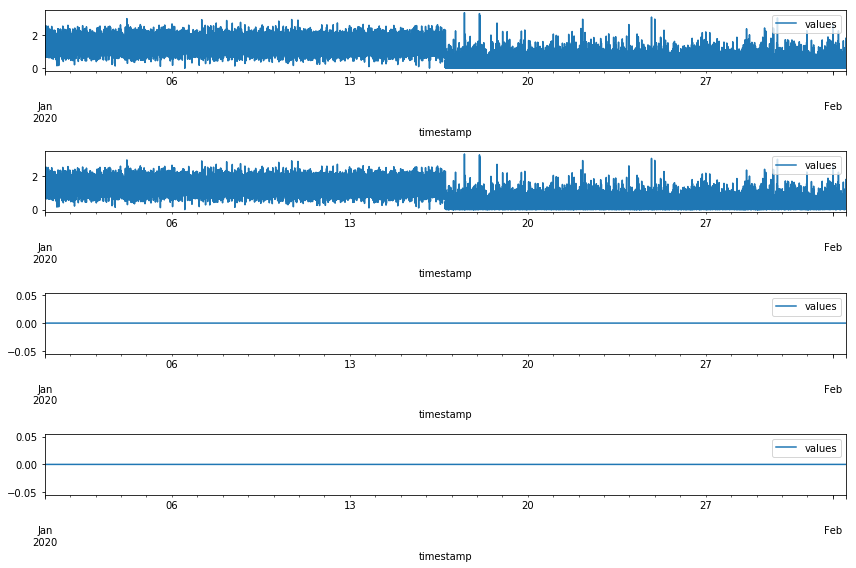

In [10]:

result = seasonal_decompose(df, model='additive', freq=1)
 
# Nesse gráfico, decompomos a série temporal em Observação original, Tendência, Sazonalidade e Resíduos 
fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize=(12,8))
result.observed.plot(ax=ax1)
result.trend.plot(ax=ax2)
result.seasonal.plot(ax=ax3)
result.resid.plot(ax=ax4)
plt.tight_layout()

### Pelos gráficos, notamos que o problema deve ter começado no dia 17/01

## Questão 4: Más práticas de engenharia de software
É comum observarmos código mal-escrito no mercado de dados. Abaixo você encontrará alguns excertos de código ineficiente ou problemático. Como você os corrigiria ou os otimizaria?

- **a)** O código abaixo refere-se ao cálculo da sequência de fibonacci. Como você pode observar com o resultado da análise de runtime, essa função é bem ineficiente, demorando 32 segundos para calcular 40 números da sequência. De que forma ele poderia ser otimizado para que responda mais rapidamente?

In [11]:
# por favor não mexa nessa célula:
# questão 4, item a):
def fibonacci(n):
    if n in [0, 1]:
        return n
    return fibonacci(n - 1) + fibonacci(n - 2)

n = 40

# Atenção: se você rodar essa célula novamente vai demorar bastante!
%timeit -r1 -n1 fibonacci(n)

36.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [12]:
# questão 4, resposta para item a)
def fibonacci_mdl(n):
    ultimo=1
    penultimo=1

    if n in [0, 1, 2]:
        return n
    else:
        for count in range(2,n):
            termo = ultimo + penultimo
            penultimo = ultimo
            ultimo = termo
            count += 1
        return n

n = 40

%timeit -r1 -n1 fibonacci_mdl(n)


4.77 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


- **b)** O código abaixo refere-se a tentar inicializar uma varíavel numa dataframe pandas. No entanto, como pode observar, demora pouco mais de 1 segundo para importar um arquivo de 100 MB e quanto maior o arquivo, mais tempo demora. De que forma esse código poderia ser otimizado para carregar mais rápido o arquivo?

In [13]:
# questão 4, item b):
import pandas as pd

%timeit -r1 -n1 pd.read_csv('./datasets/access.log', sep='\t')

1.91 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [15]:
# questão 4, resposta para item b)
import time
start_time = time.time()

import csv

input_file = './datasets/access.log'
data = csv.DictReader(open(input_file))
print("Resultado - %s seconds" % (time.time() - start_time))


Resultado - 0.0024614334106445312 seconds


- **c)** O código abaixo reflete uma situação comum num cenário de dados: carregar um arquivo grande demais para a memória do computador. De que forma poderíamos realizar a operação em questão sem ter problemas de memória?

In [16]:
%%timeit -r1 -n1
# questão 4, item c):
import pandas as pd
import numpy as np

# imagine que o arquivo em questão é bem maior (cerca de 16 GB)
logs = pd.read_csv('./datasets/access.log',sep='\t', 
                 names=['TIMESTAMP','RESPONSE_TIME'])
logs['TIMESTAMP'] = pd.to_datetime(logs['TIMESTAMP'], unit='s')
logs = logs.sort_values(by='TIMESTAMP')
logs = logs.set_index('TIMESTAMP')

# calculando operações 
# Define the features you'll calculate for each window
rolling_logs = logs.rolling(20, min_periods=5, closed='right')
to_calculate = [np.min, np.max, np.mean, np.std]
features = rolling_logs.aggregate(to_calculate)

5.07 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [17]:
%%timeit -r1 -n1

# questão 4, resposta para item c)
import pandas as pd
import numpy as np

# imagine que o arquivo em questão é bem maior (cerca de 16 GB)
logs = pd.read_csv('./datasets/access.log',sep='\t', 
                   names=['IP','TIMESTAMP','METHOD','DOC','HTTP','RESPONSE_TIME','OTHER']
                   )[['TIMESTAMP', 'RESPONSE_TIME']]

logs['TIMESTAMP'] = pd.to_datetime(logs['TIMESTAMP'], unit='s')
logs = logs.sort_values(by='TIMESTAMP')
logs = logs.set_index('TIMESTAMP')

# calculando operações 
# Define the features you'll calculate for each window
rolling_logs = logs.rolling(20, min_periods=5, closed='right')
del logs

to_calculate = [np.min, np.max, np.mean, np.std]
features = rolling_logs.aggregate(to_calculate)

2.19 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


## Sugestões:
- Pensem nesse notebook como a apresentação da sua abordagem quanto a um problema do dia-a-dia a um(a) colega de trabalho. Seria ótimo se o código e as respostas estivessem bem documentadas, certo? Nomes de variáveis, estrutura das classes ou funções, docstrings, tudo isso é bastante importante para o trabalho em equipe e compartilhamento de conhecimento, duas coisas que valorizamos muito na área de AIOps;
- Leiam com atenção a seção de **Contexto dos clientes internos e usuários** e pensem em como melhor comunicar os resultados tendo em conta, por exemplo, o grupo usuário final do insight gerado.
- Não se limitem a forma de apresentação das respostas. Usem imagens, desenhos, gifs, gráficos. Demonstrem seu raciocínio da forma que acharem mais esclarecedora;
- Se não souberem de algum tema específico colocado aqui (por exemplo, o que são logs Weblogic), façam as devidas pesquisas de referência na internet. A não ser que seja uma informação estritamente pecular à Vivo ou à equipe de AIOps, informações quanto ao conteúdo abordado não serão descritas;

## Contatos:
- Para dúvidas em relação ao desafio ou submissão das respostas, contatar Mateus Gomes no e-mail mateus.pgomes@telefonica.com;
- Para dúvidas em relação à vaga e a próximos passos, contatar Lívia Oliveira no e-mail liviam.oliveira@telefonica.com;

## Referências
As referências devem ser colocadas no formato: Autor, Título, Url de acesso. Em caso de livros, apenas Autor, Título e Edição serão suficientes.

Exemplo:
- [**Elastic.co**, *Documentação do agente Metricbeat*, https://www.elastic.co/guide/en/beats/metricbeat/current/exported-fields-system.html](https://www.elastic.co/guide/en/beats/metricbeat/current/exported-fields-system.html)